In [3]:
import sys
import pandas as pd
import os
import platform
print(platform.python_version())

3.5.4


In [4]:
rootDir = 'V:/Dropbox/ShareIrene/ScienceFair/Experiments/DataFiles/20180217_2314/'

In [5]:
motion_map = {'UndercutAndUp': 1, 'Curl_90degree': 2, 'Lotus': 3}

# Process csv file

1. Extract quaternions
2. Transpose and name data column

In [6]:
def prepare_csv_df(csv_df, dataName, motion):
    #1. Extract quaternions
    df = csv_df[['quat_w','quat_x','quat_y','quat_z']]
    #2. Transpose (stack)
    df = pd.DataFrame(df.stack())
    #3. Name data column (multi-index)
    columns = [(motion,dataName)]
    df.columns = pd.MultiIndex.from_tuples(columns)
    #4. Transpose
    df = df.T
    df.index.names = ['motion', 'dataName']
    return df

In [7]:
# all_df = pd.DataFrame()
# df_list = []
def addCsvDf(df_list, csv_df, dataName, motion):
    df = prepare_csv_df(csv_df, dataName, motion)
    if df.isnull().values.any():
        print("Null values")
    df_list.append(prepare_csv_df(csv_df, dataName, motion))
#     return none

# Loop through data directories
Assume that in the root directory is a set of sub-directories.<br>
The name of the sub-directory matches a motion-name.<br>
Each sub-directory contains a set of csv file, each with one motion.
One motion is a fixed set of samples of the IMU.


In [8]:
# motions_dict = {}
def read_csv_files(rootDir):
    df_list = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        motionName = dirName.replace(rootDir, '') #Feature name based on the dir name
        if len(motionName) > 0:
#             print('Motion: %s' % motionName)
            for fname in fileList:
                filename, file_extension = os.path.splitext(fname)
                csv_file = os.path.join(dirName, fname)
                fileSize = os.path.getsize(csv_file)
                dataName = fname.replace('.CSV', '')
#                 print('\t%s, size = %i, data = %s' % (fname, fileSize, dataName))
                if (fileSize > 0):
                    df = pd.read_csv(csv_file)
                    if len(df.index) >= 48:
                        df = df.head(48)
                        if not df.isnull().values.any():
                            addCsvDf(df_list, df, dataName, motionName)
                        else:
                            print('Found null values')
                    else :
                        print('Less than 49 samples: ' + fname)
    all_df = pd.concat(df_list)
    if all_df.isnull().values.any():
        print ("NULL")
    return all_df

In [9]:
all_df = read_csv_files(rootDir)
all_df.head(100)

Less than 49 samples: .dropbox.attr
Less than 49 samples: .dropbox.attr
Less than 49 samples: .dropbox.attr


0                               1           \
                        quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA2    -0.4460  0.4829  0.3152 -0.6844 -0.4540  0.4691   
              DATA3    -0.4362  0.4586  0.2965 -0.7153 -0.4439  0.4406   
              DATA4    -0.4521  0.4647  0.2635 -0.7143 -0.4597  0.4517   
              DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   
              DATA5    -0.5342  0.4603  0.2696 -0.6559 -0.5482  0.4367   
              DATA6    -0.5223  0.4662  0.3555 -0.6193 -0.5359  0.4528   
              DATA7    -0.5336  0.4245  0.3156 -0.6599 -0.5433  0.4112   
              DATA8    -0.5862  0.4359  0.3292 -0.5983 -0.6052  0.4182   
              DATA9    -0.5800  0.4340  0.3274 -0.6066 -0.5965  0.4178   
              DATA10   -0.5858  0.4354  0.3359 -0.5955 -0.5982  0.4217   
              DATA11   -0.5681  0.4307  0.2999 -0.6339 -0.5832  0.4154   
              DATA12   -0.5953  0.4124  0.2927 -0.6244 -0.6054  0.3964   
              DATA13   -0.6444  0.3477  0.2029 -0.6501 -0.6537  0.3321   
              DATA14   -0.5931  0.4186  0.3132 -0.6122 -0.6033  0.4050   
              DATA15   -0.5585  0.4313  0.3514 -0.6153 -0.5681  0.4178   
              DATA16   -0.6050  0.4005  0.3098 -0.6146 -0.6147  0.3884   
              DATA17   -0.6006  0.3908  0.3140 -0.6228 -0.6130  0.3758   
              DATA18   -0.5733  0.4327  0.2863 -0.6342 -0.5839  0.4172   
              DATA19   -0.5132  0.4529  0.3049 -0.6622 -0.5356  0.4259   
              DATA20   -0.4830  0.4695  0.3049 -0.6733 -0.5057  0.4377   
              DATA21   -0.4625  0.5148  0.3157 -0.6492 -0.4801  0.4954   
              DATA22   -0.4719  0.4810  0.2759 -0.6854 -0.4848  0.4661   
              DATA23   -0.6340  0.3596  0.2933 -0.6186 -0.6473  0.3364   
              DATA24   -0.5782  0.3837  0.2835 -0.6619 -0.5857  0.3674   
              DATA25   -0.5171  0.4365  0.2910 -0.6763 -0.5304  0.4145   
UndercutAndUp DATA0     0.3701 -0.4883 -0.5746  0.5425  0.3480 -0.5373   
              DATA1     0.4117 -0.4879 -0.4786  0.6028  0.3942 -0.5092   
              DATA2     0.2808 -0.5282 -0.5795  0.5535  0.2390 -0.6346   
              DATA3     0.2884 -0.6479 -0.4515  0.5414  0.2128 -0.7639   
...                        ...     ...     ...     ...     ...     ...   
              DATA22    0.3668 -0.5663 -0.4141  0.6110  0.3148 -0.6393   
              DATA23    0.2845 -0.6492 -0.3708  0.6001  0.2279 -0.7278   
              DATA24    0.3092 -0.6184 -0.2577  0.6749  0.2458 -0.6771   
              DATA25    0.3688 -0.5413 -0.4477  0.6088  0.3151 -0.5992   
Lotus         DATA25   -0.2584 -0.6901  0.4169  0.5323 -0.2815 -0.6415   
              DATA13   -0.2370 -0.6195  0.5607  0.4957 -0.2599 -0.5778   
              DATA14   -0.2687 -0.6107  0.4962  0.5556 -0.2970 -0.5685   
              DATA15   -0.2897 -0.5169  0.6946  0.4078 -0.3004 -0.4195   
              DATA16   -0.2303 -0.6602  0.4086  0.5866 -0.2701 -0.6139   
              DATA17   -0.2468 -0.6164  0.4987  0.5573 -0.2728 -0.5800   
              DATA18   -0.2581 -0.5712  0.5563  0.5455 -0.2692 -0.5125   
              DATA19   -0.1913 -0.6425  0.4442  0.5944 -0.2344 -0.6017   
              DATA20   -0.2667 -0.4648  0.7553  0.3773 -0.2690 -0.4207   
              DATA21   -0.2794 -0.5680  0.6417  0.4330 -0.3159 -0.5023   
              DATA22   -0.2800 -0.5709  0.6639  0.3936 -0.3102 -0.4993   
              DATA23   -0.2368 -0.5932  0.6590  0.3972 -0.2643 -0.5287   
              DATA24   -0.1724 -0.6558  0.3785  0.6300 -0.2020 -0.6307   
              DATA0    -0.2866 -0.6842  0.4042  0.5351 -0.3180 -0.6118   
              DATA1    -0.1943 -0.7123  0.4976  0.4551 -0.2253 -0.6750   
              DATA2    -0.1846 -0.6661  0.5864  0.4222 -0.2250 -0.6093   
              DATA3    -0.1443 -

In [10]:
X = all_df
df = all_df.copy()
# df.index.names = ['motion', 'dataName']
df = df.reset_index()
Y = df['motion']
Y.head(10)

0    Curl_90degree
1    Curl_90degree
2    Curl_90degree
3    Curl_90degree
4    Curl_90degree
5    Curl_90degree
6    Curl_90degree
7    Curl_90degree
8    Curl_90degree
9    Curl_90degree
Name: motion, dtype: object

In [11]:
X.head()

0                               1           \
                        quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA2    -0.4460  0.4829  0.3152 -0.6844 -0.4540  0.4691   
              DATA3    -0.4362  0.4586  0.2965 -0.7153 -0.4439  0.4406   
              DATA4    -0.4521  0.4647  0.2635 -0.7143 -0.4597  0.4517   
              DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   

                                            2            ...        45  \
                        quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion        dataName                                   ...             
Curl_90degree DATA2     0.3000 -0.6956 -0.4645  0.4528   ...    0.2961   
              DATA3     0.2780 -0.7291 -0.4519  0.4203   ...    0.2836   
              DATA4     0.2455 -0.7242 -0.4689  0.4351   ...    0.3291   
              DATA0     0.2955 -0.6840 -0.5044  0.4164   ...    0.3179   
              DATA1     0.2693 -0.7159 -0.4878  0.4163   ...    0.2977   

                                    46                              47  \
                        quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion        dataName                                                   
Curl_90degree DATA2    -0.7042 -0.4512  0.4655  0.3080 -0.6964 -0.4448   
              DATA3    -0.7089 -0.4351  0.4817  0.2955 -0.7009 -0.4277   
              DATA4    -0.6689 -0.4191  0.5174  0.3287 -0.6698 -0.4187   
              DATA0    -0.6750 -0.4850  0.4585  0.3273 -0.6689 -0.4784   
              DATA1    -0.6968 -0.4617  0.4651  0.3069 -0.6901 -0.4576   

                                                
                        quat_x  quat_y  quat_z  
motion        dataName                          
Curl_90degree DATA2     0.4739  0.3164 -0.6910  
              DATA3     0.4913  0.3047 -0.6949  
              DATA4     0.5166  0.3269 -0.6716  
              DATA0     0.4664  0.3358 -0.6639  
              DATA1     0.4728  0.3153 -0.6838  

[5 rows x 192 columns]

In [12]:
X.isnull().values.any()

False

In [13]:
Y.isnull().values.any()

False

# Plotting - Data Preparation

In [14]:
X.index

MultiIndex(levels=[['Curl_90degree', 'Lotus', 'UndercutAndUp'], ['DATA0', 'DATA1', 'DATA10', 'DATA11', 'DATA12', 'DATA13', 'DATA14', 'DATA15', 'DATA16', 'DATA17', 'DATA18', 'DATA19', 'DATA2', 'DATA20', 'DATA21', 'DATA22', 'DATA23', 'DATA24', 'DATA25', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'DATA8', 'DATA9']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [12, 19, 20, 0, 1, 21, 22, 23, 24, 25, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 0, 1, 12, 19, 20, 21, 22, 23, 24, 25, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 18, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 0, 1, 12, 19, 20, 21, 22, 23, 24, 25, 2, 3, 4]],
           names=['motion', 'dataName'])

In [64]:
motionNames = X.index.levels[0].tolist()
motionNames

['Curl_90degree', 'Lotus', 'UndercutAndUp']

In [23]:
X.columns

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], ['quat_w', 'quat_x', 'quat_y', 'quat_z']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47], [0, 1

In [73]:
X1 = X.copy()
X1.columns.names = ['sample','qt']
X1.head()

sample                      0                               1           \
qt                      quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA2    -0.4460  0.4829  0.3152 -0.6844 -0.4540  0.4691   
              DATA3    -0.4362  0.4586  0.2965 -0.7153 -0.4439  0.4406   
              DATA4    -0.4521  0.4647  0.2635 -0.7143 -0.4597  0.4517   
              DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   

sample                                      2            ...        45  \
qt                      quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion        dataName                                   ...             
Curl_90degree DATA2     0.3000 -0.6956 -0.4645  0.4528   ...    0.2961   
              DATA3     0.2780 -0.7291 -0.4519  0.4203   ...    0.2836   
              DATA4     0.2455 -0.7242 -0.4689  0.4351   ...    0.3291   
              DATA0     0.2955 -0.6840 -0.5044  0.4164   ...    0.3179   
              DATA1     0.2693 -0.7159 -0.4878  0.4163   ...    0.2977   

sample                              46                              47  \
qt                      quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion        dataName                                                   
Curl_90degree DATA2    -0.7042 -0.4512  0.4655  0.3080 -0.6964 -0.4448   
              DATA3    -0.7089 -0.4351  0.4817  0.2955 -0.7009 -0.4277   
              DATA4    -0.6689 -0.4191  0.5174  0.3287 -0.6698 -0.4187   
              DATA0    -0.6750 -0.4850  0.4585  0.3273 -0.6689 -0.4784   
              DATA1    -0.6968 -0.4617  0.4651  0.3069 -0.6901 -0.4576   

sample                                          
qt                      quat_x  quat_y  quat_z  
motion        dataName                          
Curl_90degree DATA2     0.4739  0.3164 -0.6910  
              DATA3     0.4913  0.3047 -0.6949  
              DATA4     0.5166  0.3269 -0.6716  
              DATA0     0.4664  0.3358 -0.6639  
              DATA1     0.4728  0.3153 -0.6838  

[5 rows x 192 columns]

In [33]:
X1.loc['Curl_90degree'].head()

sample        0                               1                           \
qt        quat_w  quat_x  quat_y  quat_z  quat_w  quat_x  quat_y  quat_z   
dataName                                                                   
DATA2    -0.4460  0.4829  0.3152 -0.6844 -0.4540  0.4691  0.3000 -0.6956   
DATA3    -0.4362  0.4586  0.2965 -0.7153 -0.4439  0.4406  0.2780 -0.7291   
DATA4    -0.4521  0.4647  0.2635 -0.7143 -0.4597  0.4517  0.2455 -0.7242   
DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440  0.2955 -0.6840   
DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315  0.2693 -0.7159   

sample        2            ...        45              46                  \
qt        quat_w  quat_x   ...    quat_y  quat_z  quat_w  quat_x  quat_y   
dataName                   ...                                             
DATA2    -0.4645  0.4528   ...    0.2961 -0.7042 -0.4512  0.4655  0.3080   
DATA3    -0.4519  0.4203   ...    0.2836 -0.7089 -0.4351  0.4817  0.2955   
DATA4    -0.4689  0.4351   ...    0.3291 -0.6689 -0.4191  0.5174  0.3287   
DATA0    -0.5044  0.4164   ...    0.3179 -0.6750 -0.4850  0.4585  0.3273   
DATA1    -0.4878  0.4163   ...    0.2977 -0.6968 -0.4617  0.4651  0.3069   

sample                47                          
qt        quat_z  quat_w  quat_x  quat_y  quat_z  
dataName                                          
DATA2    -0.6964 -0.4448  0.4739  0.3164 -0.6910  
DATA3    -0.7009 -0.4277  0.4913  0.3047 -0.6949  
DATA4    -0.6698 -0.4187  0.5166  0.3269 -0.6716  
DATA0    -0.6689 -0.4784  0.4664  0.3358 -0.6639  
DATA1    -0.6901 -0.4576  0.4728  0.3153 -0.6838  

[5 rows x 192 columns]

In [78]:
qt_w = X1.xs('quat_w', level='qt', axis=1).xs('Curl_90degree', level='motion', axis=0)
qt_w = qt_w.reset_index()
qt_w = qt_w.drop(['dataName'], axis = 1)
qt_w.head()

sample,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.4460,-0.4540,-0.4645,-0.4790,-0.4894,-0.4996,-0.5129,-0.5269,-0.5392,-0.5485,...,-0.5391,-0.5275,-0.5164,-0.5047,-0.4932,-0.4813,-0.4698,-0.4590,-0.4512,-0.4448
1,-0.4362,-0.4439,-0.4519,-0.4631,-0.4724,-0.4816,-0.4916,-0.5029,-0.5150,-0.5219,...,-0.5214,-0.5148,-0.5048,-0.4921,-0.4816,-0.4694,-0.4569,-0.4453,-0.4351,-0.4277
2,-0.4521,-0.4597,-0.4689,-0.4783,-0.4911,-0.5071,-0.5217,-0.5342,-0.5448,-0.5543,...,-0.4453,-0.4326,-0.4197,-0.4142,-0.4160,-0.4171,-0.4191,-0.4198,-0.4191,-0.4187
3,-0.4968,-0.4977,-0.5044,-0.5040,-0.5144,-0.5295,-0.5459,-0.5590,-0.5691,-0.5826,...,-0.5446,-0.5386,-0.5294,-0.5200,-0.5115,-0.5024,-0.4944,-0.4901,-0.4850,-0.4784
4,-0.4685,-0.4783,-0.4878,-0.4963,-0.5057,-0.5131,-0.5218,-0.5299,-0.5372,-0.5461,...,-0.5359,-0.5243,-0.5156,-0.5071,-0.4973,-0.4861,-0.4766,-0.4680,-0.4617,-0.4576


In [77]:
qt_x = X1.xs('quat_x', level='qt', axis=1).xs('Curl_90degree', level='motion', axis=0)
qt_x = qt_x.reset_index()
qt_x = qt_x.drop(['dataName'], axis = 1)
qt_x.head()

sample,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.4829,0.4691,0.4528,0.4334,0.4192,0.4043,0.3863,0.3659,0.3456,0.3284,...,0.3269,0.3470,0.3695,0.3912,0.4052,0.4160,0.4350,0.4537,0.4655,0.4739
1,0.4586,0.4406,0.4203,0.4028,0.3887,0.3743,0.3586,0.3358,0.3094,0.2909,...,0.3543,0.3687,0.3860,0.4061,0.4234,0.4384,0.4532,0.4678,0.4817,0.4913
2,0.4647,0.4517,0.4351,0.4169,0.3943,0.3706,0.3478,0.3256,0.3008,0.2687,...,0.4785,0.4966,0.5138,0.5207,0.5178,0.5181,0.5184,0.5177,0.5174,0.5166
3,0.4646,0.4440,0.4164,0.4013,0.3781,0.3517,0.3252,0.3051,0.2875,0.2627,...,0.3517,0.3660,0.3841,0.4008,0.4149,0.4289,0.4423,0.4507,0.4585,0.4664
4,0.4519,0.4315,0.4163,0.4016,0.3873,0.3743,0.3609,0.3472,0.3316,0.3112,...,0.3445,0.3637,0.3781,0.3931,0.4092,0.4253,0.4410,0.4549,0.4651,0.4728


In [83]:
def getMultiMotions(X, qtName, motionName):
    '''qt is the name of the quaternion (e.g. 'quat_w'). motion is the name of the motion (e.g. 'Curl_90degree'). 
    Should match the names of the indices of df X.
    Returns a df with multiple time-series of the quaternion of the motion type'''
    
    df = X.xs(qtName, level='qt', axis=1)\
        .xs(motionName, level='motion', axis=0)\
        .reset_index()\
        .drop(['dataName'], axis = 1)
    return df

In [86]:
getMultiMotions(X1, 'quat_x', 'Curl_90degree').head()

sample,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.4829,0.4691,0.4528,0.4334,0.4192,0.4043,0.3863,0.3659,0.3456,0.3284,...,0.3269,0.3470,0.3695,0.3912,0.4052,0.4160,0.4350,0.4537,0.4655,0.4739
1,0.4586,0.4406,0.4203,0.4028,0.3887,0.3743,0.3586,0.3358,0.3094,0.2909,...,0.3543,0.3687,0.3860,0.4061,0.4234,0.4384,0.4532,0.4678,0.4817,0.4913
2,0.4647,0.4517,0.4351,0.4169,0.3943,0.3706,0.3478,0.3256,0.3008,0.2687,...,0.4785,0.4966,0.5138,0.5207,0.5178,0.5181,0.5184,0.5177,0.5174,0.5166
3,0.4646,0.4440,0.4164,0.4013,0.3781,0.3517,0.3252,0.3051,0.2875,0.2627,...,0.3517,0.3660,0.3841,0.4008,0.4149,0.4289,0.4423,0.4507,0.4585,0.4664
4,0.4519,0.4315,0.4163,0.4016,0.3873,0.3743,0.3609,0.3472,0.3316,0.3112,...,0.3445,0.3637,0.3781,0.3931,0.4092,0.4253,0.4410,0.4549,0.4651,0.4728


# Plotting

In [15]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

In [54]:
w1 = w.reset_index()
w1 = w1.drop(['dataName'], axis=1)
w1.head()

sample,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.4460,-0.4540,-0.4645,-0.4790,-0.4894,-0.4996,-0.5129,-0.5269,-0.5392,-0.5485,...,-0.5391,-0.5275,-0.5164,-0.5047,-0.4932,-0.4813,-0.4698,-0.4590,-0.4512,-0.4448
1,-0.4362,-0.4439,-0.4519,-0.4631,-0.4724,-0.4816,-0.4916,-0.5029,-0.5150,-0.5219,...,-0.5214,-0.5148,-0.5048,-0.4921,-0.4816,-0.4694,-0.4569,-0.4453,-0.4351,-0.4277
2,-0.4521,-0.4597,-0.4689,-0.4783,-0.4911,-0.5071,-0.5217,-0.5342,-0.5448,-0.5543,...,-0.4453,-0.4326,-0.4197,-0.4142,-0.4160,-0.4171,-0.4191,-0.4198,-0.4191,-0.4187
3,-0.4968,-0.4977,-0.5044,-0.5040,-0.5144,-0.5295,-0.5459,-0.5590,-0.5691,-0.5826,...,-0.5446,-0.5386,-0.5294,-0.5200,-0.5115,-0.5024,-0.4944,-0.4901,-0.4850,-0.4784
4,-0.4685,-0.4783,-0.4878,-0.4963,-0.5057,-0.5131,-0.5218,-0.5299,-0.5372,-0.5461,...,-0.5359,-0.5243,-0.5156,-0.5071,-0.4973,-0.4861,-0.4766,-0.4680,-0.4617,-0.4576


In [59]:
w2 = w1.loc[:]
w2.head()

sample,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.4460,-0.4540,-0.4645,-0.4790,-0.4894,-0.4996,-0.5129,-0.5269,-0.5392,-0.5485,...,-0.5391,-0.5275,-0.5164,-0.5047,-0.4932,-0.4813,-0.4698,-0.4590,-0.4512,-0.4448
1,-0.4362,-0.4439,-0.4519,-0.4631,-0.4724,-0.4816,-0.4916,-0.5029,-0.5150,-0.5219,...,-0.5214,-0.5148,-0.5048,-0.4921,-0.4816,-0.4694,-0.4569,-0.4453,-0.4351,-0.4277
2,-0.4521,-0.4597,-0.4689,-0.4783,-0.4911,-0.5071,-0.5217,-0.5342,-0.5448,-0.5543,...,-0.4453,-0.4326,-0.4197,-0.4142,-0.4160,-0.4171,-0.4191,-0.4198,-0.4191,-0.4187
3,-0.4968,-0.4977,-0.5044,-0.5040,-0.5144,-0.5295,-0.5459,-0.5590,-0.5691,-0.5826,...,-0.5446,-0.5386,-0.5294,-0.5200,-0.5115,-0.5024,-0.4944,-0.4901,-0.4850,-0.4784
4,-0.4685,-0.4783,-0.4878,-0.4963,-0.5057,-0.5131,-0.5218,-0.5299,-0.5372,-0.5461,...,-0.5359,-0.5243,-0.5156,-0.5071,-0.4973,-0.4861,-0.4766,-0.4680,-0.4617,-0.4576


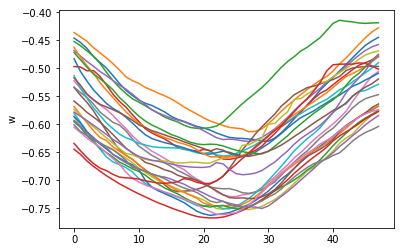

In [60]:
plt.plot(w2.T)
plt.ylabel('w')
plt.show()

In [16]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

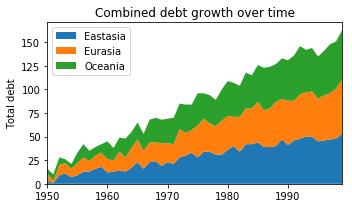

In [17]:
plt.show()

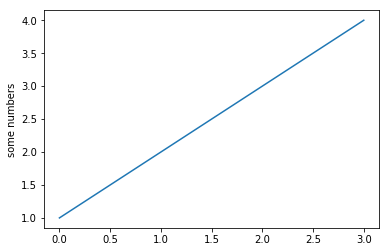

In [18]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [19]:
movement = all_df.iloc[0].unstack()
movement.head()

,quat_w,quat_x,quat_y,quat_z
0,-0.4460,0.4829,0.3152,-0.6844
1,-0.4540,0.4691,0.3000,-0.6956
2,-0.4645,0.4528,0.2860,-0.7053
3,-0.4790,0.4334,0.2725,-0.7131
4,-0.4894,0.4192,0.2597,-0.7193


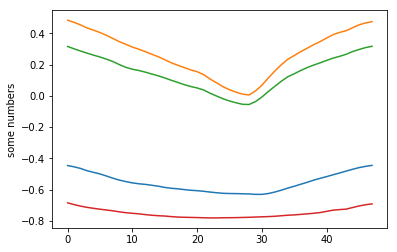

In [20]:
movement = all_df.iloc[0].unstack()
movement.quat_x
#labels=['w', 'x', 'y', 'z']
plt.plot(movement)
plt.ylabel('some numbers')
plt.show()

In [21]:
# movement.index.tolist()

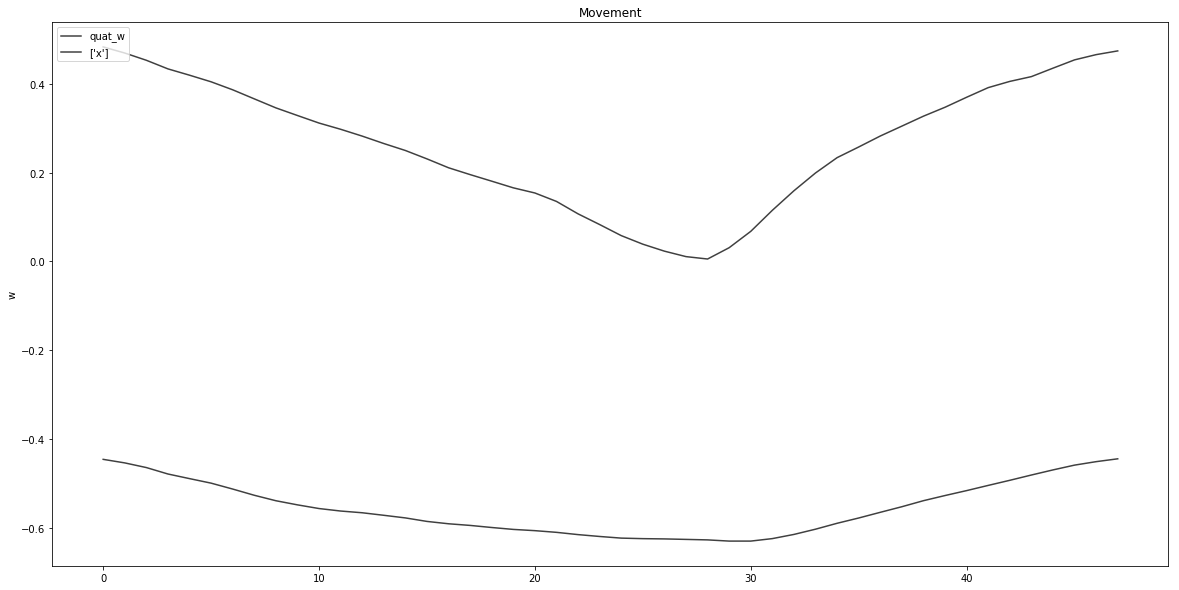

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(movement.index.tolist(), movement.quat_w,  color='.25')#, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.plot(movement.index.tolist(), movement.quat_x, label=['x'], color='.25')
ax.set_title('Movement')
ax.legend(loc='upper left')
ax.set_ylabel('w')
plt.show()

In [117]:
def plotMotion(X, motionName):
    fig, (ax_w,ax_x,ax_y,ax_z) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    fig.suptitle(motionName, fontsize=20)
    ax_w.set_autoscaley_on(False)
    ax_w.set_ylim([-1,1])
    ax_w.set_title('w')
    ax_x.set_autoscaley_on(False)
    ax_x.set_ylim([-1,1])
    ax_x.set_title('x')
    ax_y.set_autoscaley_on(False)
    ax_y.set_ylim([-1,1])
    ax_y.set_title('y')
    ax_z.set_autoscaley_on(False)
    ax_z.set_ylim([-1,1])
    ax_z.set_title('z')
    ax_w.plot(getMultiMotions(X, 'quat_w', motionName).T)
    ax_x.plot(getMultiMotions(X, 'quat_x', motionName).T)
    ax_y.plot(getMultiMotions(X, 'quat_y', motionName).T)
    ax_z.plot(getMultiMotions(X, 'quat_z', motionName).T)
    return fig

In [118]:
motionNames = X.index.levels[0].tolist()
motionNames

['Curl_90degree', 'Lotus', 'UndercutAndUp']

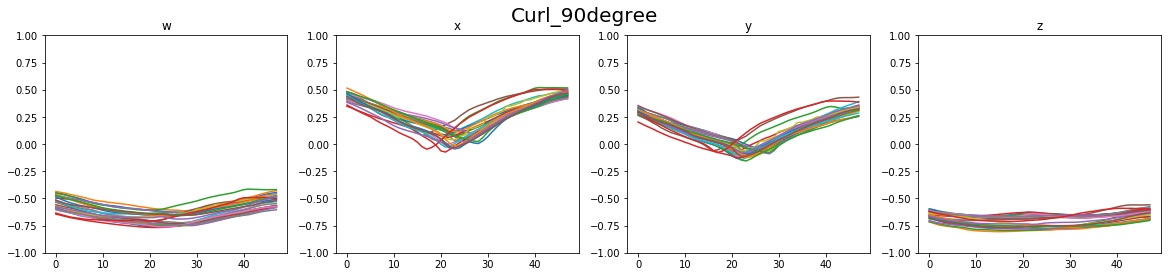

In [119]:
plotMotion(X1, motionNames[0])
plt.show()

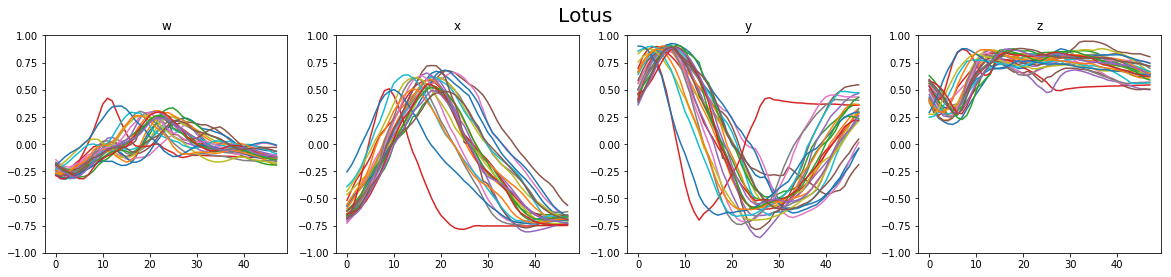

In [120]:
plotMotion(X1, motionNames[1])
plt.show()

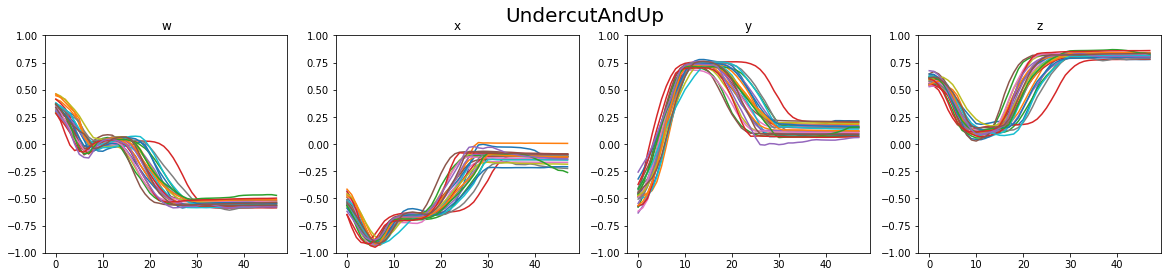

In [121]:
plotMotion(X1, motionNames[2])
plt.show()

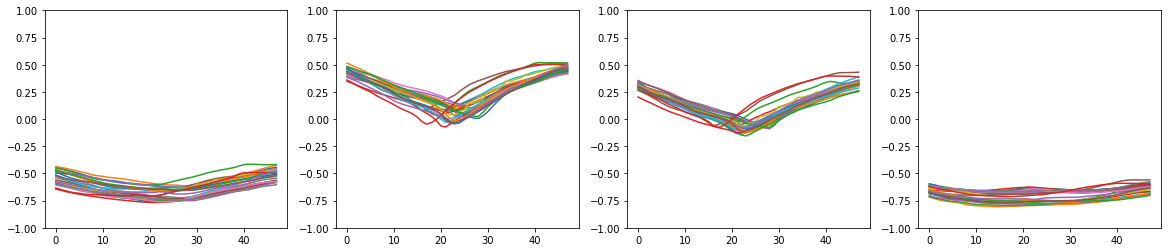

In [95]:
fig, (ax_w,ax_x,ax_y,ax_z) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
#ax_w.plot(qt_w.T)
ax_w.set_autoscaley_on(False)
ax_w.set_ylim([-1,1])
ax_x.set_autoscaley_on(False)
ax_x.set_ylim([-1,1])
ax_y.set_autoscaley_on(False)
ax_y.set_ylim([-1,1])
ax_z.set_autoscaley_on(False)
ax_z.set_ylim([-1,1])
ax_w.plot(getMultiMotions(X1, 'quat_w', 'Curl_90degree').T)
ax_x.plot(getMultiMotions(X1, 'quat_x', 'Curl_90degree').T)
ax_y.plot(getMultiMotions(X1, 'quat_y', 'Curl_90degree').T)
ax_z.plot(getMultiMotions(X1, 'quat_z', 'Curl_90degree').T)
plt.show()

In [122]:
motionNames

['Curl_90degree', 'Lotus', 'UndercutAndUp']

In [133]:
def plotMotion2D(X, motionNames):
    numMotions = len(motionNames)
    fig, axes = plt.subplots(nrows=numMotions, ncols=4, figsize=(20, numMotions*4))
#     fig.suptitle(motionName, fontsize=20)
    for motionIdx in range(0,numMotions):
        motionName = motionNames[motionIdx]
        for qtIdx in range(0,4):
            axes[motionIdx][qtIdx].set_autoscaley_on(False)
            axes[motionIdx][qtIdx].set_ylim([-1,1])
        
        axes[motionIdx][0].set_ylabel(motionName)
        axes[motionIdx][0].set_title('w')
        axes[motionIdx][1].set_title('x')
        axes[motionIdx][2].set_title('y')
        axes[motionIdx][3].set_title('z')
        axes[motionIdx][0].plot(getMultiMotions(X, 'quat_w', motionName).T)
        axes[motionIdx][1].plot(getMultiMotions(X, 'quat_x', motionName).T)
        axes[motionIdx][2].plot(getMultiMotions(X, 'quat_y', motionName).T)
        axes[motionIdx][3].plot(getMultiMotions(X, 'quat_z', motionName).T)
    return fig

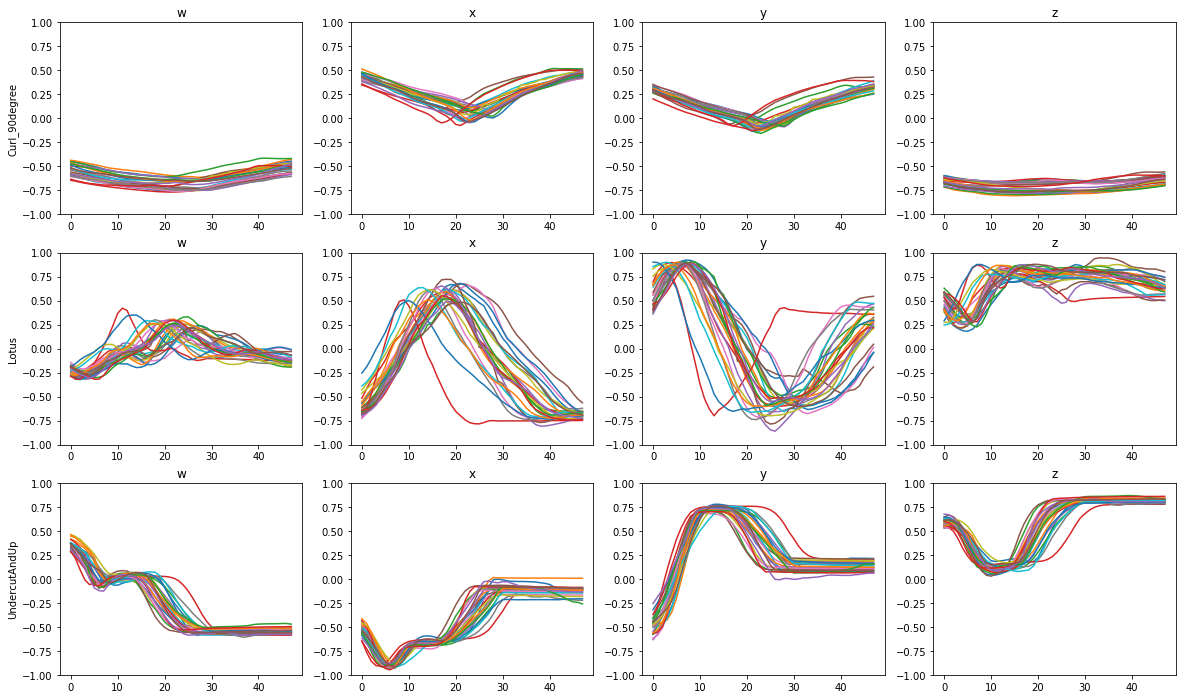

In [135]:
plotMotion2D(X1, motionNames)
plt.show()